In [1]:
!chmod 600 kaggle.json

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d prathamtripathi/regression-with-neural-networking

  0% 0.00/11.1k [00:00<?, ?B/s]
100% 11.1k/11.1k [00:00<00:00, 8.55MB/s]


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from scipy import stats

In [5]:
import zipfile

In [7]:
file = zipfile.ZipFile('/content/regression-with-neural-networking.zip','r')
file.extractall()
file.close()

In [8]:
df = pd.read_csv('/content/concrete_data.csv')

In [9]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
583,210.7,316.1,0.0,185.7,0.0,977.0,689.3,28,37.81
570,295.8,0.0,0.0,185.7,0.0,1091.4,769.3,28,25.22
757,350.0,0.0,0.0,203.0,0.0,974.0,775.0,7,18.13
70,374.0,189.2,0.0,170.1,10.1,926.1,756.7,3,34.40
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3,21.78


In [16]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


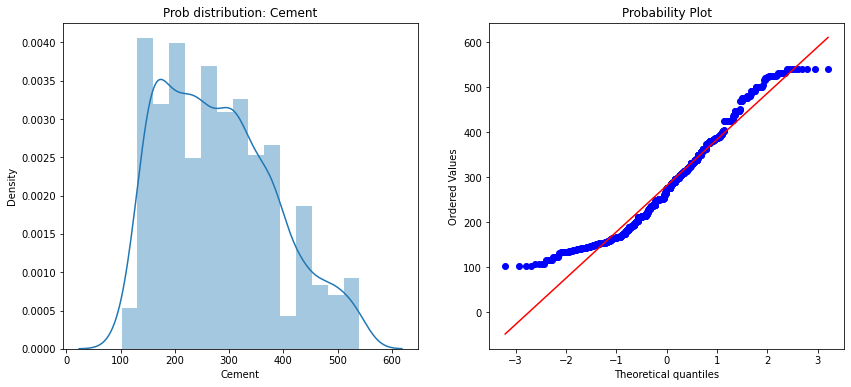

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


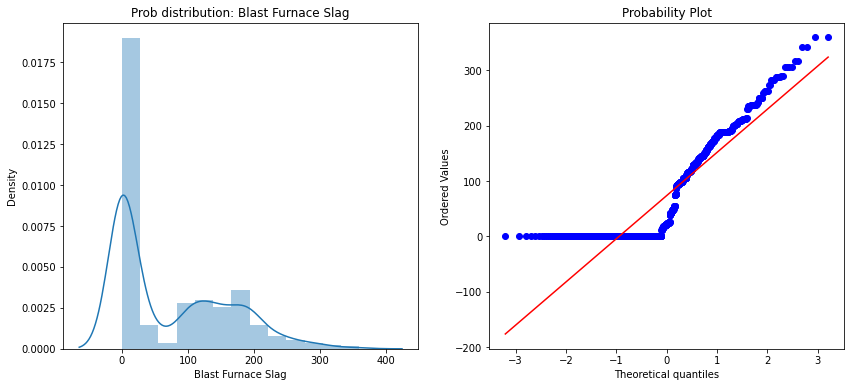

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


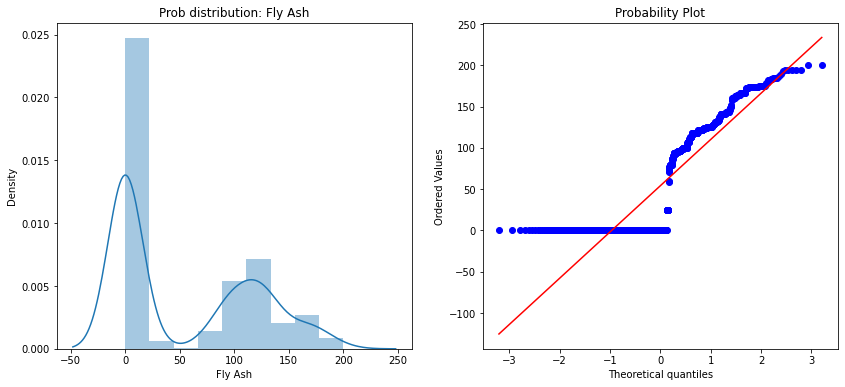

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


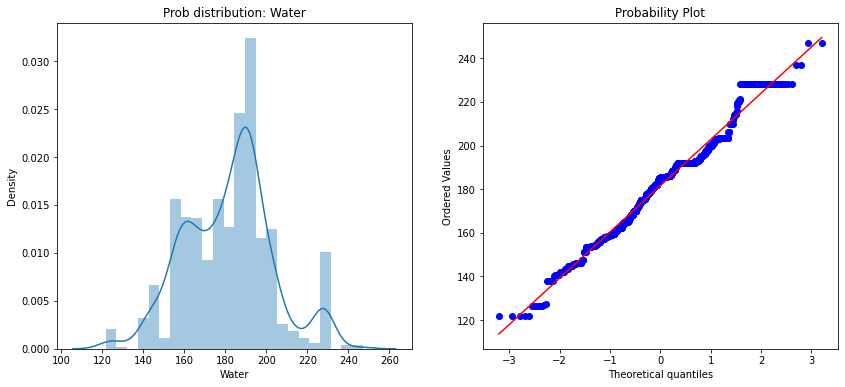

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


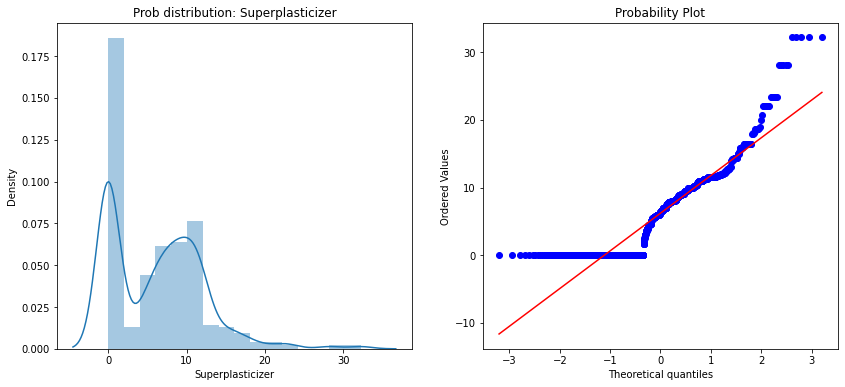

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


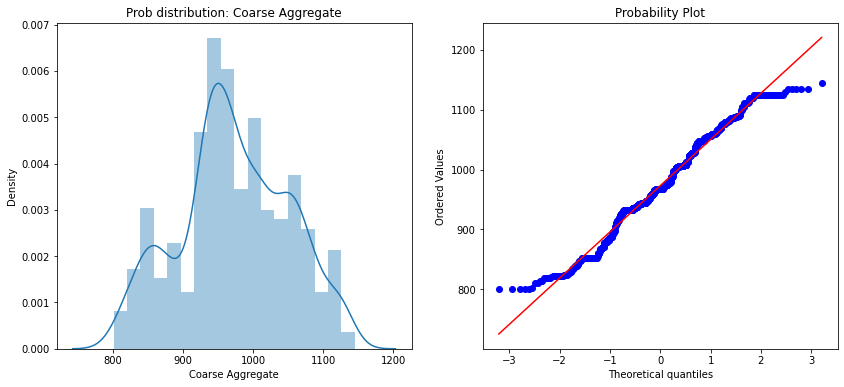

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


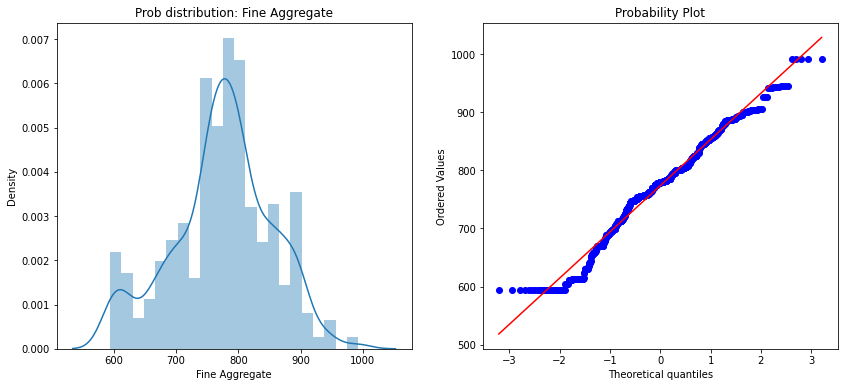

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


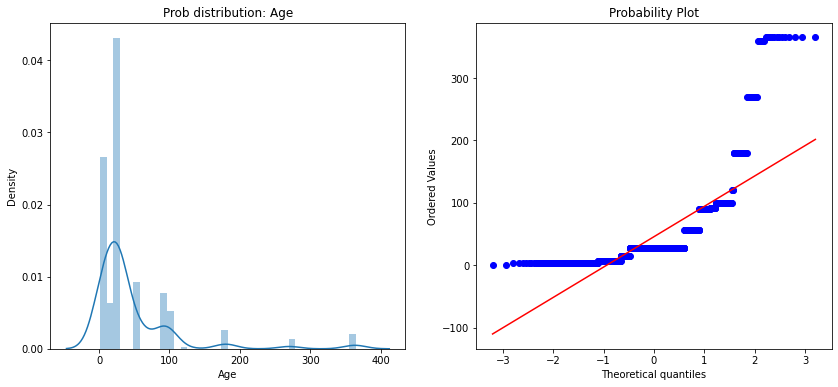

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


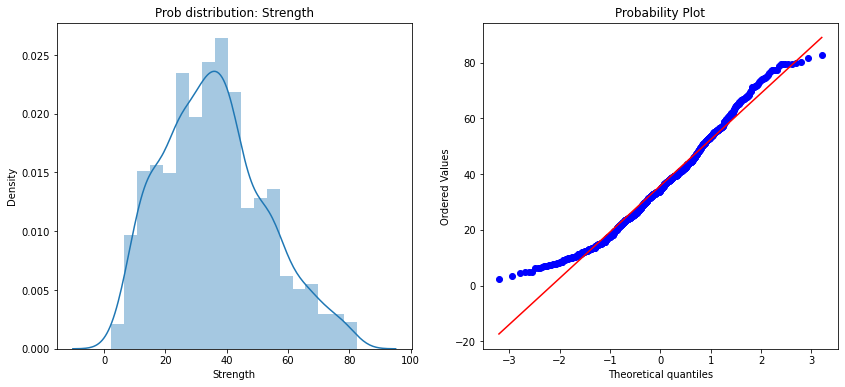

In [38]:
for col in df.columns:
  plt.subplots(figsize=(14,6))
  plt.subplot(121)
  plt.title(f'Prob distribution: {col}',loc='center')
  sns.distplot(df[col])

  plt.subplot(122)
  plt.title(f'QQ plot: {col}',loc='center')
  stats.probplot(df[col],plot=plt,dist='norm')
  plt.show()

In [17]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['Strength']),df['Strength'],test_size=0.2,random_state=42)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

<AxesSubplot:>

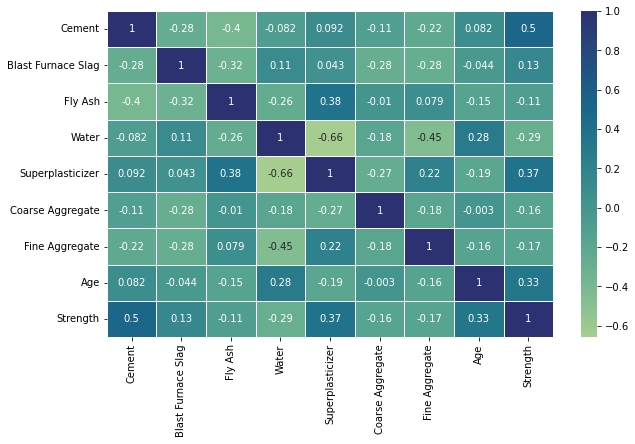

In [30]:
plt.rcParams['figure.figsize'] = 10,6
sns.heatmap(df.corr(),cmap='crest',linecolor='white',linewidths=0.5,annot=True)

### Apply box-cox power transformation to stabilize variance between features and minimize skewness of data. Data is approximated to look more Gaussian-like

In [40]:
trf1 = PowerTransformer(method='box-cox')
x_train_trans = trf1.fit_transform(x_train+0.00001) #as some cols have 0 value and box-cox works strictly with positive values
x_test_trans = trf1.transform(x_test+0.00001)

clf = LinearRegression()
clf.fit(x_train_trans,y_train)
y_pred = clf.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8054599364693938

In [42]:
cross_val = cross_val_score(clf,x_train_trans,y_train,cv=10,scoring='r2')
cross_val.mean()

0.791613231726141

In [48]:
pd.DataFrame(trf1.lambdas_,index=x_train.columns,columns=['box-cox lambdas'])


,box-cox lambdas
Cement,0.177025
Blast Furnace Slag,0.027842
Fly Ash,-0.044554
Water,0.772682
Superplasticizer,0.113892
Coarse Aggregate,1.129813
Fine Aggregate,1.782018
Age,0.066630


### Apply Yeo-johnson power transformation on features and check r2 score. Works well with both negative and positive values

In [43]:
trf2 = PowerTransformer() #default method is yeo-johnson
x_train_trans1 = trf2.fit_transform(x_train) 
x_test_trans1 = trf2.transform(x_test)

clf = LinearRegression()
clf.fit(x_train_trans1,y_train)
y_pred1 = clf.predict(x_test_trans1)
r2_score(y_test,y_pred1)

0.8161906512004999

In [50]:
cross_val1 = cross_val_score(clf,x_train_trans1,y_train,cv=10,scoring='r2')
cross_val1.mean()

0.7936885677171945

In [49]:
pd.DataFrame(trf2.lambdas_,index=x_train.columns,columns=['Yeo-johnson lambdas'])

,Yeo-johnson lambdas
Cement,0.174348
Blast Furnace Slag,0.015715
Fly Ash,-0.161447
Water,0.771307
Superplasticizer,0.253935
Coarse Aggregate,1.130050
Fine Aggregate,1.783100
Age,0.019885


In [51]:
x_trans = pd.DataFrame(x_train_trans1,columns=x_train.columns)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


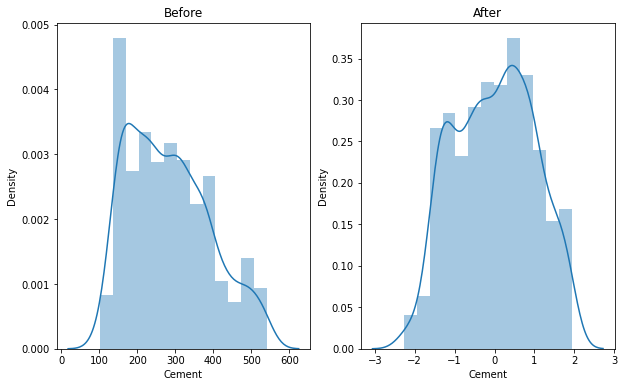

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


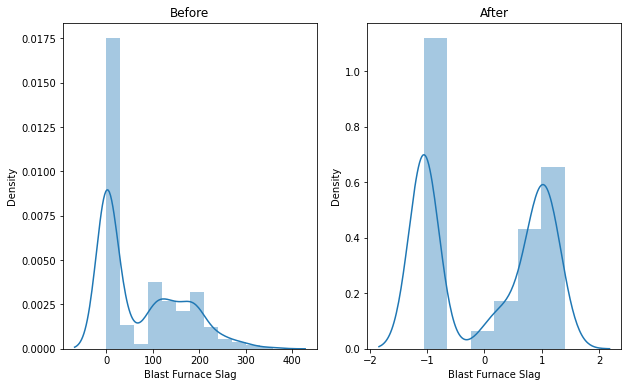

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


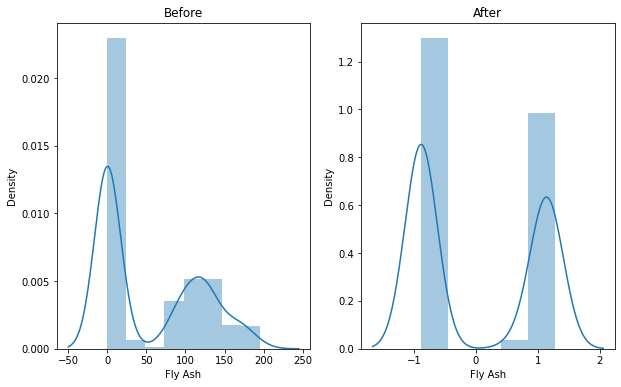

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


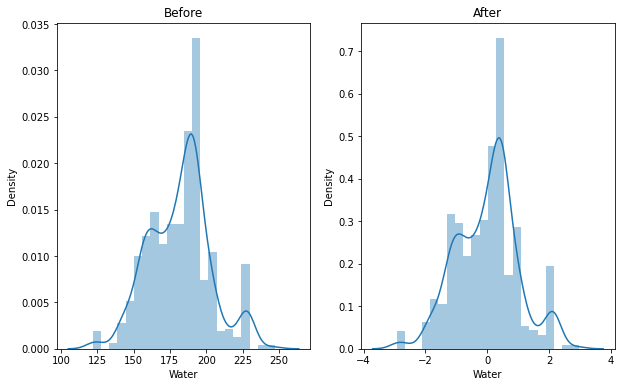

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


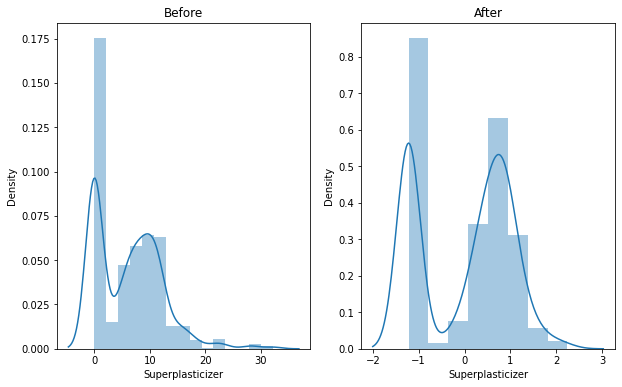

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


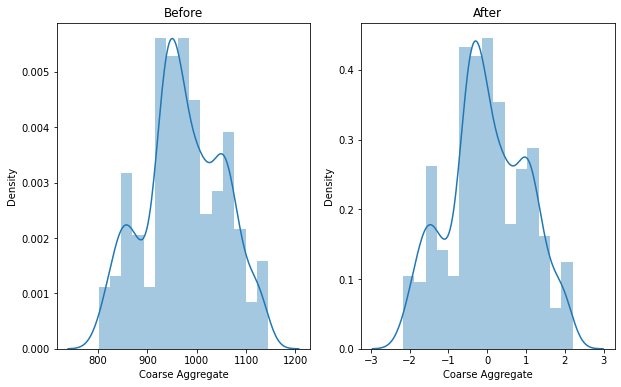

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


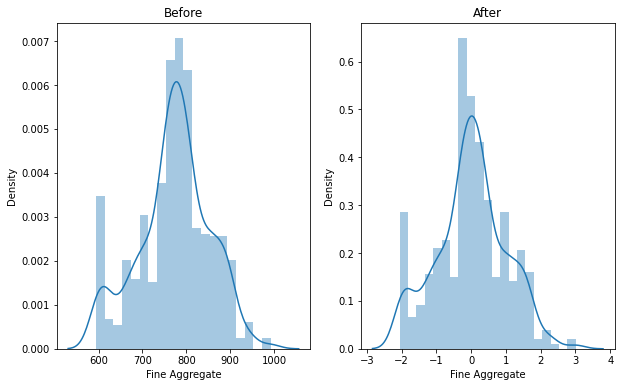

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


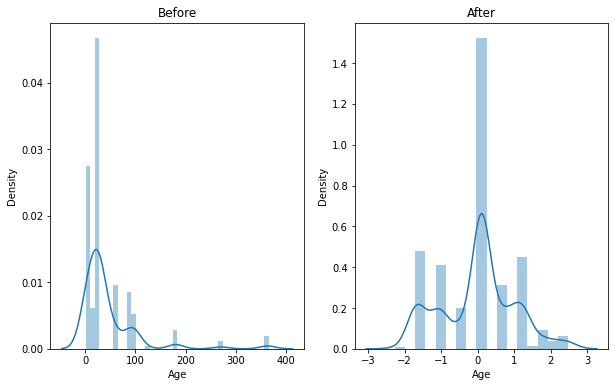

In [53]:
for col in x_trans.columns:
  plt.subplot(121)
  plt.title('Before')
  sns.distplot(x_train[col])

  plt.subplot(122)
  plt.title('After')
  sns.distplot(x_trans[col])
  plt.show()